# Environment

## The OAIS Environment

The [Open Archival Information System (OAIS)][^oais] presents a simple model for the environment an archive operates in:

![The OAIS environment model.](./images/oais-environment.png)

```{glue:} oais_environment
```

## Kinds of Environment

Audiences, internal archive, enchanced care of the same to the same audence. e.g. BBC Archive.







### Direct 

![Space-time plot visualising events in the OAIS environment pattern.](./images/spacetime-context-direct.png)

Crucially, this means the DIP is generated from the AIP...

Pipeline versus sidecar preservation

POINT: If your not generating your DIP from your actual AIP you’re not doing OAIS.

Use digitised images as example. Look at risks of the sidecar approach. 



### Backup (via the publisher)

![Space-time plot visualising events in the 'backup' environment pattern.](./images/spacetime-plots-context-backup.png)

### Failover (via the published record)

![Space-time plot visualising events in the 'failover' environment pattern.](./images/spacetime-plots-context-failover.png)



[^oais]: https://public.ccsds.org/pubs/650x0m2.pdf




## Space-Time Diagrams

Visualising events and processes over time

I wanted a clear way to visualise events over time when talking about how we do digital preservation.  As my background is in physics, I wondered whether a simple version of a space-time diagram would work.

While these diagrams are mostly used in [relativity](https://en.wikipedia.org/wiki/Minkowski_diagram) and [quantum mechanics](https://en.wikipedia.org/wiki/Feynman_diagram), they can also be used to visualise simple physical systems, as shown below:

![Examples of space-time plots, visualising simple physical systems.](./images/spacetime-plots-intro.png)

As you can see, if an object is not moving, then it traces our a simple line parallel with the time axes.  If the object is moving through space, then the line runs at an angle -- the steeper the line, the faster the object is moving. If you plot two objects colliding, then the lines converge until the two objects start to bounce off each other. The lines then curve away until the two objects are heading in opposite directions.

While the events in the history of a digital archive behave very differently, a space-time diagram still provide a useful way of visualising what's going on.

```{glue:figure} spacetime_oais_fig
:figwidth: 100%
:name: "spacetime_oais_fig"

Visualisation of the basic OAIS workflow as a space-time trajectory.
```

See {doc}`/patterns/contexts/contexts` for more examples.

Idea of generating space-time plots rather than making them by hand:

- Plot e.g. SIP/AIP/DIP trajectories, add annotations and tick marks for names and places.
- Highlight events [like the dots on these plots](https://matplotlib.org/3.3.0/gallery/text_labels_and_annotations/annotation_demo.html#using-multiple-coordinate-systems-and-axis-types)
- Highlight time periods [like this](https://datavizpyr.com/highlight-a-time-range-in-time-series-plot-in-python-with-matplotlib/)

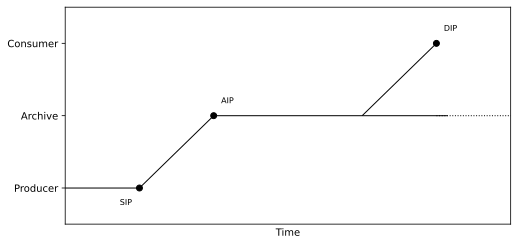

In [74]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse

plt.rc('font', size=10)

fig, ax=plt.subplots(figsize=[8,4])
ax.set_xlim([1,7])
ax.set_ylim([0.5,3.5])

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Producer', 'Archive', 'Consumer'])
# No x-axis ticks
ax.set_xticks([])
ax.set_xlabel('Time')

l1 = [(1, 1), (2, 1), (3,2), (6,2), (6.15,2)]
l2 = [(5,2), (6, 3)]
l3 = [(6,2), (7,2)]
lc = LineCollection([l1, l2, l3], color="k", lw=1, linestyle=['-','-',':'])

ax.add_collection(lc)

# Add SIP:
plt.plot(2, 1, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('SIP', fontsize=8,
            xy=(2, 1), xycoords='data',
            xytext=(1.9, 0.85), textcoords='data',
            horizontalalignment='right', verticalalignment='top')

# Add AIP:
plt.plot(3, 2, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('AIP', fontsize=8,
            xy=(3, 2), xycoords='data',
            xytext=(3.1, 2.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

# Add DIP:
plt.plot(6, 3, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('DIP', fontsize=8,
            xy=(6, 3), xycoords='data',
            xytext=(6.1, 3.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

# Make this figure available for use in other pages:
from myst_nb import glue
glue("spacetime_oais_fig", fig, display=False)

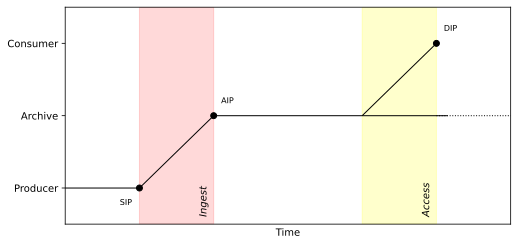

In [75]:
# Now highlight Ingest and Access:
ax.axvspan(2, 3, alpha=0.15, color='red', label='Ingest')
ax.annotate('Ingest', fontsize=10, rotation=90, style='italic',
            xy=(2.8, 0.6), xycoords='data',
            horizontalalignment='left', verticalalignment='bottom')

ax.axvspan(5, 6, alpha=0.2, color='yellow', label='Access')
ax.annotate('Access', fontsize=10, rotation=90, style='italic',
            xy=(5.8, 0.6), xycoords='data',
            horizontalalignment='left', verticalalignment='bottom')


# Make this modified figure available for use in other pages:
glue("spacetime_oais_fig_lit", fig, display=True)

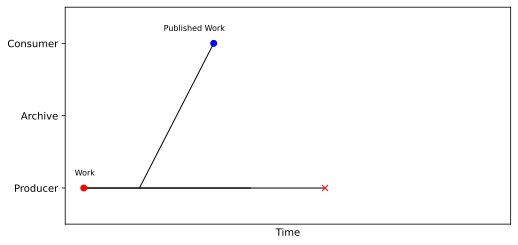

In [76]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse

plt.rc('font', size=10)

fig, ax=plt.subplots(figsize=[8,4])
ax.set_xlim([1,7])
ax.set_ylim([0.5,3.5])

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Producer', 'Archive', 'Consumer'])
# No x-axis ticks
ax.set_xticks([])
ax.set_xlabel('Time')

lines = [
    [(1.25, 1), (2, 1), (3,3)],
    [(1.25, 1), (2.5, 1), (3.5,1)],
    [(2,1),(4.5,1)],
]
lc = LineCollection(lines, color="k", lw=1, linestyle=['-','-','-','-','-',':'])

ax.add_collection(lc)

# Add the Producer's work:
plt.plot(1.25, 1, marker='o', markersize=6, color='r', zorder=10.0)
ax.annotate('Work', fontsize=8,
            xy=(3, 3), xycoords='data',
            xytext=(1.4, 1.15), textcoords='data',
            horizontalalignment='right', verticalalignment='bottom')
# Add Producer Published Work
plt.plot(3, 3, marker='o', markersize=6, color='b', zorder=10.0)
ax.annotate('Published Work', fontsize=8,
            xy=(3, 3), xycoords='data',
            xytext=(3.15, 3.15), textcoords='data',
            horizontalalignment='right', verticalalignment='bottom')
# Add Producer Ceases Publication:
plt.plot(4.5, 1, marker='x', markersize=6, color='r', zorder=10.0)

plt.show()

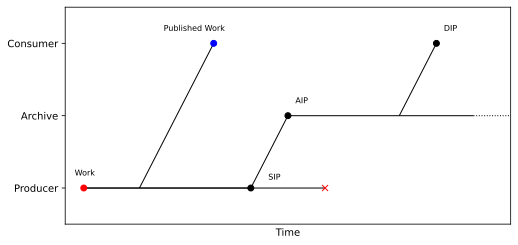

In [77]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse

plt.rc('font', size=10)

fig, ax=plt.subplots(figsize=[8,4])
ax.set_xlim([1,7])
ax.set_ylim([0.5,3.5])

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Producer', 'Archive', 'Consumer'])
# No x-axis ticks
ax.set_xticks([])
ax.set_xlabel('Time')

lines = [
    [(1.25, 1), (2, 1), (3,3)],
    [(1.25, 1), (2.5, 1), (3.5,1)],
    [(2,1),(4.5,1)],
    [(3.5,1), (4,2), (5.5,2), (6, 3)],
    [(5.5,2), (6.5,2)],
    [(6.5,2), (7,2)],
]
lc = LineCollection(lines, color="k", lw=1, linestyle=['-','-','-','-','-',':'])

ax.add_collection(lc)

# Add the Producer's work:
plt.plot(1.25, 1, marker='o', markersize=6, color='r', zorder=10.0)
ax.annotate('Work', fontsize=8,
            xy=(3, 3), xycoords='data',
            xytext=(1.4, 1.15), textcoords='data',
            horizontalalignment='right', verticalalignment='bottom')
# Add Producer Published Work
plt.plot(3, 3, marker='o', markersize=6, color='b', zorder=10.0)
ax.annotate('Published Work', fontsize=8,
            xy=(3, 3), xycoords='data',
            xytext=(3.15, 3.15), textcoords='data',
            horizontalalignment='right', verticalalignment='bottom')
# Add Producer Ceases Publication:
plt.plot(4.5, 1, marker='x', markersize=6, color='r', zorder=10.0)

# Add SIP:
plt.plot(3.5, 1, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('SIP', fontsize=8,
            xy=(3.5, 1), xycoords='data',
            xytext=(3.9, 1.2), textcoords='data',
            horizontalalignment='right', verticalalignment='top')

# Add AIP:
plt.plot(4, 2, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('AIP', fontsize=8,
            xy=(4, 2), xycoords='data',
            xytext=(4.1, 2.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

# Add DIP:
plt.plot(6, 3, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('DIP', fontsize=8,
            xy=(6, 3), xycoords='data',
            xytext=(6.1, 3.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

plt.show()

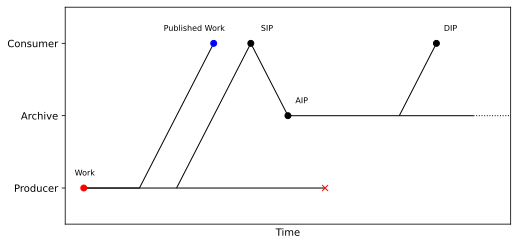

In [78]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse

plt.rc('font', size=10)

fig, ax=plt.subplots(figsize=[8,4])
ax.set_xlim([1,7])
ax.set_ylim([0.5,3.5])

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Producer', 'Archive', 'Consumer'])
# No x-axis ticks
ax.set_xticks([])
ax.set_xlabel('Time')

lines = [
    [(1.25, 1), (2, 1), (3,3)],
    [(1.25, 1), (2.5, 1), (3.5,3)],
    [(2.5,1),(4.5,1)],
    [(3.5,3), (4,2), (5.5,2), (6, 3)],
    [(5.5,2), (6.5,2)],
    [(6.5,2), (7,2)],
]
lc = LineCollection(lines, color="k", lw=1, linestyle=['-','-','-','-','-',':'])

ax.add_collection(lc)

# Add the Producer's work:
plt.plot(1.25, 1, marker='o', markersize=6, color='r', zorder=10.0)
ax.annotate('Work', fontsize=8,
            xy=(3, 3), xycoords='data',
            xytext=(1.4, 1.15), textcoords='data',
            horizontalalignment='right', verticalalignment='bottom')
# Add Producer Published Work
plt.plot(3, 3, marker='o', markersize=6, color='b', zorder=10.0)
ax.annotate('Published Work', fontsize=8,
            xy=(3, 3), xycoords='data',
            xytext=(3.15, 3.15), textcoords='data',
            horizontalalignment='right', verticalalignment='bottom')
# Add Producer Ceases Publication:
plt.plot(4.5, 1, marker='x', markersize=6, color='r', zorder=10.0)

# Add SIP:
plt.plot(3.5, 3, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('SIP', fontsize=8,
            xy=(3, 1), xycoords='data',
            xytext=(3.8, 3.15), textcoords='data',
            horizontalalignment='right', verticalalignment='bottom')

# Add AIP:
plt.plot(4, 2, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('AIP', fontsize=8,
            xy=(4, 2), xycoords='data',
            xytext=(4.1, 2.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

# Add DIP:
plt.plot(6, 3, marker='o', markersize=6, color='k', zorder=10.0)
ax.annotate('DIP', fontsize=8,
            xy=(6, 3), xycoords='data',
            xytext=(6.1, 3.15), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom')

plt.show()